In [2]:
# batch
# epoch
# accuracy
# loss

import os
import pandas as pd
from pprint import pprint
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000
plt.style.use('seaborn-whitegrid')

In [3]:
def list_dir(path, hidden = False, file_type = ''):
    if hidden:
        return list(filter(lambda x: x.endswith(file_type), os.listdir(path)))
    else:
        return list(filter(lambda x: x[0] != '.' and x.endswith(file_type), os.listdir(path)))
    

def display_side_by_side(dfs, captions):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

def create_labels(values, min_space = 1, rounder = 2):
    new_values = [values[0]]
    for i in range(accuracies.__len__() - 1):
        if round(values[i + 1] - new_values[-1], rounder) > min_space:
            new_values += [values[i + 1]]

    if values[-1] not in new_values:
        new_values[-1] = values[-1]

    return new_values

In [4]:
DATASET = '50TH'

models = list_dir('./npy-new/models/' + DATASET, file_type = 'hdf5')
pprint(models)

['256-13-0.93-0.00312.hdf5',
 '512-09-0.92-0.00322.hdf5',
 '256-20-0.92-0.00301.hdf5',
 '1024-13-0.92-0.00474.hdf5',
 '350-02-0.78-0.00456.hdf5',
 '128-08-0.91-0.00296.hdf5',
 '1024-19-0.92-0.00473.hdf5',
 '256-15-0.93-0.00308.hdf5',
 '256-19-0.92-0.00302.hdf5',
 '2048-08-0.91-0.00396.hdf5',
 '32-20-0.85-0.00391.hdf5',
 '512-03-0.92-0.00355.hdf5',
 '32-11-0.85-0.00391.hdf5',
 '32-01-0.76-0.01027.hdf5',
 '1024-10-0.92-0.00474.hdf5',
 '256-10-0.93-0.00320.hdf5',
 '350-16-0.91-0.00305.hdf5',
 '2048-06-0.89-0.00487.hdf5',
 '350-20-0.92-0.00300.hdf5',
 '350-01-0.49-0.02485.hdf5',
 '1024-02-0.77-0.00591.hdf5',
 '32-19-0.85-0.00391.hdf5',
 '512-17-0.92-0.00304.hdf5',
 '1024-04-0.92-0.00479.hdf5',
 '512-14-0.92-0.00310.hdf5',
 '2048-05-0.85-0.00516.hdf5',
 '32-18-0.85-0.00391.hdf5',
 '256-04-0.93-0.00342.hdf5',
 '128-17-0.91-0.00293.hdf5',
 '350-18-0.92-0.00302.hdf5',
 '350-14-0.91-0.00308.hdf5',
 '512-07-0.92-0.00329.hdf5',
 '350-17-0.91-0.00303.hdf5',
 '350-10-0.91-0.00316.hdf5',
 '32-15-0.8

In [5]:
models_no_ext = list(map(lambda x: x.replace('.hdf5', ''), models))
data = list(map(lambda x: x.split('-'), models_no_ext))

# removing learning rate
data = list(map(lambda x : x[:4], data))

In [6]:
pd_data = pd.DataFrame(data, columns = ['batch_size', 'epoch', 'accuracy', 'loss'])

pd_data = pd_data.astype({
    'batch_size': int, 
    'epoch': int, 
    'accuracy': float, 
    'loss': float,
})

pd_data = pd_data.sort_values(['batch_size', 'epoch'], ascending = (True, True))

pd_data = pd_data.reset_index(drop=True)

pd_data

,batch_size,epoch,accuracy,loss
0,32,1,0.76,0.01027
1,32,2,0.79,0.00421
2,32,3,0.79,0.00419
3,32,4,0.79,0.00417
4,32,5,0.79,0.00414
5,32,6,0.80,0.00411
6,32,7,0.83,0.00404
7,32,8,0.86,0.00393
8,32,9,0.86,0.00391
9,32,10,0.85,0.00391


In [7]:
batch_sizes = pd_data.batch_size.unique()

batches = {size : None for size in batch_sizes}

MAX_EPOCHS = 100

for size, _ in batches.items():
    batches[size] = pd_data[pd_data['batch_size'] == size]
    batches[size] = batches[size].set_index(['epoch'])
    batches[size] = batches[size].drop(['batch_size'], axis = 1)

    if len(batches[size]) < MAX_EPOCHS:
        MAX_EPOCHS = len(batches[size])

list(batches.keys())

[32, 128, 256, 350, 512, 1024, 2048]

In [10]:
batches[256]

,accuracy,loss
epoch,,
1,0.81,0.01341
2,0.91,0.00391
3,0.93,0.00351
4,0.93,0.00342
5,0.93,0.00336
6,0.93,0.00332
7,0.93,0.00328
8,0.93,0.00325
9,0.93,0.00322


In [11]:
display_side_by_side(list(batches.values()), list(batches.keys()))

,accuracy,loss
epoch,,
1,0.76,0.01027
2,0.79,0.00421
3,0.79,0.00419
4,0.79,0.00417
5,0.79,0.00414
6,0.8,0.00411
7,0.83,0.00404
8,0.86,0.00393
9,0.86,0.00391


In [112]:
# if 2048 in batches.keys():
#     del batches[2048]

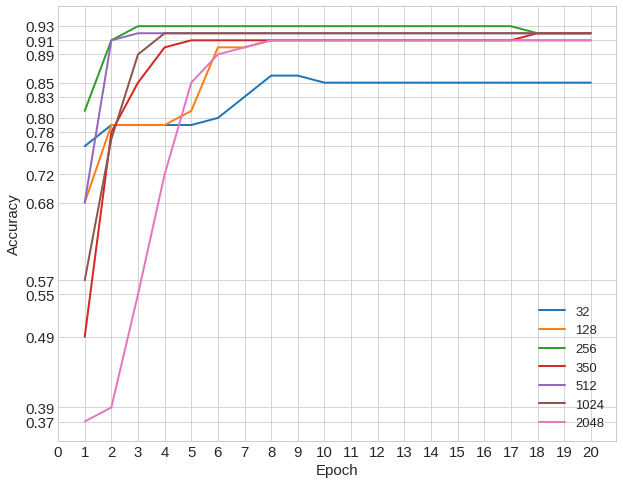

In [113]:
# MAX_EPOCHS = 3

plt.figure(figsize=(10, 8))
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)

accuracies = set()
for size, batch in batches.items():
    plt.plot(batch.index[:MAX_EPOCHS], batch.accuracy[:MAX_EPOCHS], label = size, linewidth = 2)
    plt.legend(prop = {
        'size': 13,
    })
    accuracies.update(set(batch.accuracy[:MAX_EPOCHS]))
    
accuracies = list(accuracies)
list.sort(accuracies)

accuracies = create_labels(accuracies, min_space = 0.01)

_ = plt.xticks([0, *batch.index[:MAX_EPOCHS]], fontsize = 15)
_ = plt.yticks(accuracies, fontsize = 15)

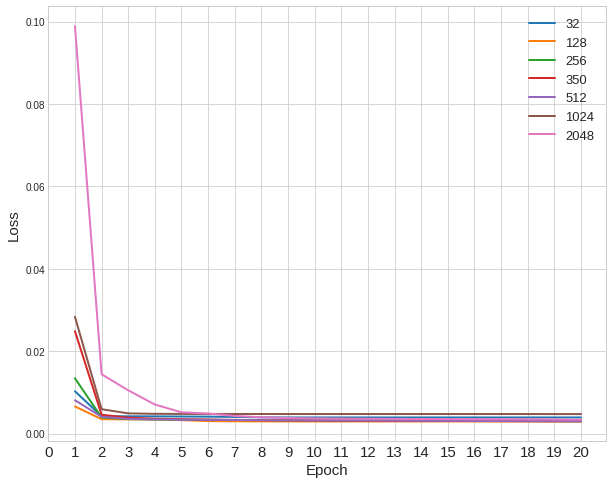

In [114]:
plt.figure(figsize=(10, 8))
plt.xlabel("Epoch", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)

losses = set()
for size, batch in batches.items():
    plt.plot(batch.index[:MAX_EPOCHS], batch.loss[:MAX_EPOCHS], label = size, linewidth = 2)
    plt.legend(prop = {
        'size': 13,
    })
    losses.update(set(batch.loss[:MAX_EPOCHS]))
    
losses = list(losses)
list.sort(losses)


_ = plt.xticks([0, *batch.index[:MAX_EPOCHS]], fontsize = 15)
# _ = plt.yticks(losses, fontsize = 15)